### transformers:OCR-free Document Understanding Transformer

Understanding document images (e.g., invoices) is a core but challenging task since it requires complex functions such as reading text and a holistic understanding of the document. Current Visual Document Understanding (VDU) methods outsource the task of reading text to off-the-shelf Optical Character Recognition (OCR) engines and focus on the understanding task with the OCR outputs. Although such OCR-based approaches have shown promising performance, they suffer from 1) high computational costs for using OCR; 2) inflexibility of OCR models on languages or types of document; 3) OCR error propagation to the subsequent process. To address these issues, in this paper, we introduce a novel OCR-free VDU model named Donut, which stands for Document understanding transformer. As the first step in OCR-free VDU research, we propose a simple architecture (i.e., Transformer) with a pre-training objective (i.e., cross-entropy loss). Donut is conceptually simple yet effective. Through extensive experiments and analyses, we show a simple OCR-free VDU model, Donut, achieves state-of-the-art performances on various VDU tasks in terms of both speed and accuracy. In addition, we offer a synthetic data generator that helps the model pre-training to be flexible in various languages and domains. The code, trained model and synthetic data are available at this https URL.


* https://huggingface.co/naver-clova-ix/donut-base
* https://arxiv.org/abs/2111.15664 

In [2]:
#pip install protobuf
#https://pypi.org/project/protobuf/

#pip install sentencepiece
#https://pypi.org/project/sentencepiece/

In [3]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-to-text", model="naver-clova-ix/donut-base")

Config of the encoder: <class 'transformers.models.donut.modeling_donut_swin.DonutSwinModel'> is overwritten by shared encoder config: DonutSwinConfig {
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    14,
    2
  ],
  "drop_path_rate": 0.1,
  "embed_dim": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": [
    2560,
    1920
  ],
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-05,
  "mlp_ratio": 4.0,
  "model_type": "donut-swin",
  "num_channels": 3,
  "num_heads": [
    4,
    8,
    16,
    32
  ],
  "num_layers": 4,
  "patch_size": 4,
  "path_norm": true,
  "qkv_bias": true,
  "transformers_version": "4.47.1",
  "use_absolute_embeddings": false,
  "window_size": 10
}

Config of the decoder: <class 'transformers.models.mbart.modeling_mbart.MBartForCausalLM'> is overwritten by shared decoder config: MBartConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "add

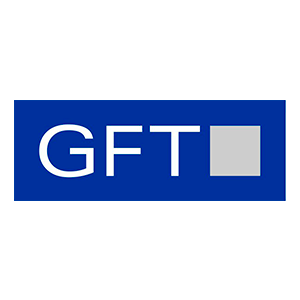

In [4]:
from PIL import Image
# Load an image
image_path =  "../logo.png"
image = Image.open(image_path).convert("RGB")  # Ensure the image is in RGB format
image

In [6]:
# Usar el pipeline para generar texto a partir de la imagen
result = pipe(image)

# Imprimir el texto generado
print(result[0]['generated_text'])